This notebook produces the network topology graphs for the presentation

In [1]:
import ising_efficient
import network_generation
import sparse_adj_mat
from sparse_adj_mat import Sparse_Adjacency_Matrix
from network_generation import generate_erdos_renyi_sparse_adjacency_matrix
from network_generation import generate_scale_free_sparse_adjacency_matrix_jax
from network_generation import generate_small_world_sparse_adjacency_matrix_jax
from ising_efficient import BeliefNetwork
from topology_simulation import simulation_topology
from topology_simulation import simulation_no_external_field_stacked
from topology_simulation import simulation_no_external_field
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from collections import deque

import numpy as np
import voronoi
import pickle

# Network topology

The three following topolgies were tested with the same network sized and average degree.

In [2]:
#shared parameters
N = 100
weight_range=(-0.04, 0.2) # weight range changed from (-1,1.0) to (-0.1, 0.2) - individuals within the network tend to agree with their neighbours 
avg_deg = 20
seed = 1

#topology parameters
#Erdos_Renyi
edge_prob = avg_deg/(N-1) 
print(edge_prob)

#Scale free - Albert Barab'asi 
new_edges = avg_deg//2 #avg_deg ~ 2m

#Small world
k_neighbours = avg_deg #k neighbours per node
rewire_prob = 0.1  #rewiring probability




0.20202020202020202


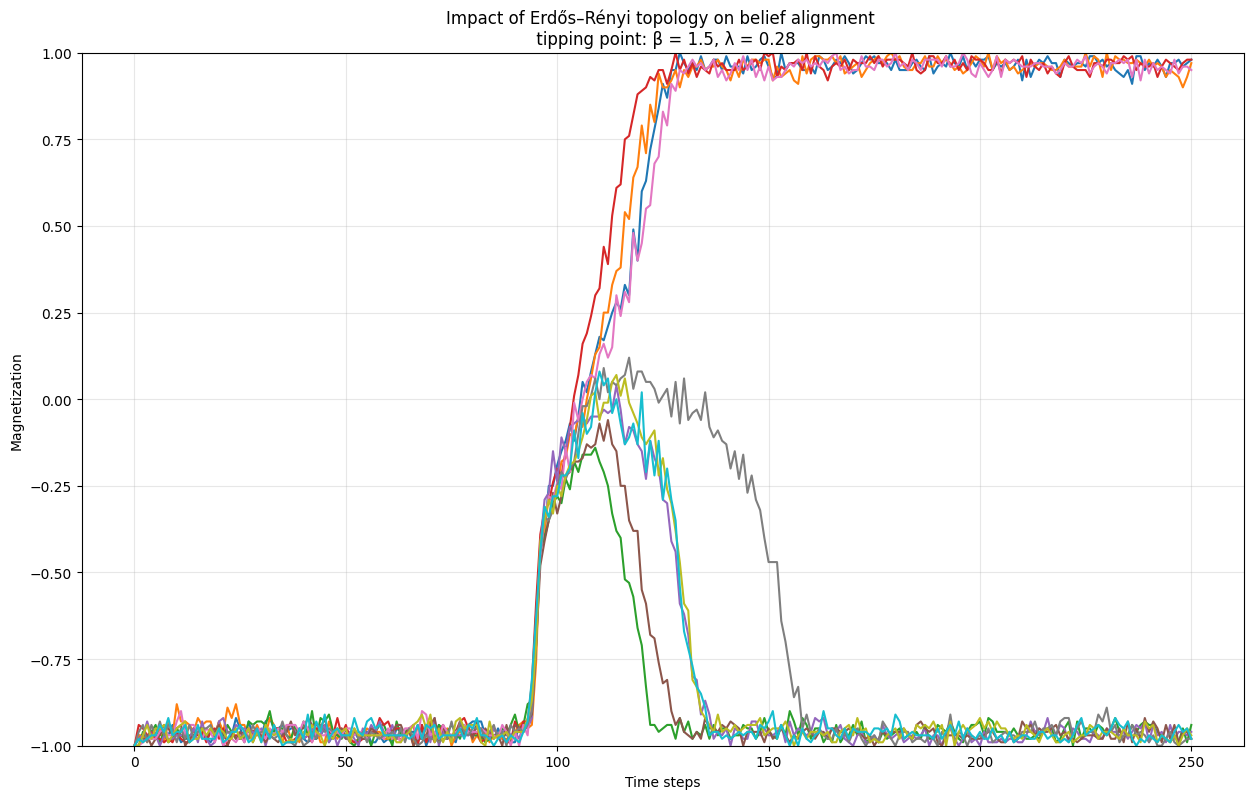

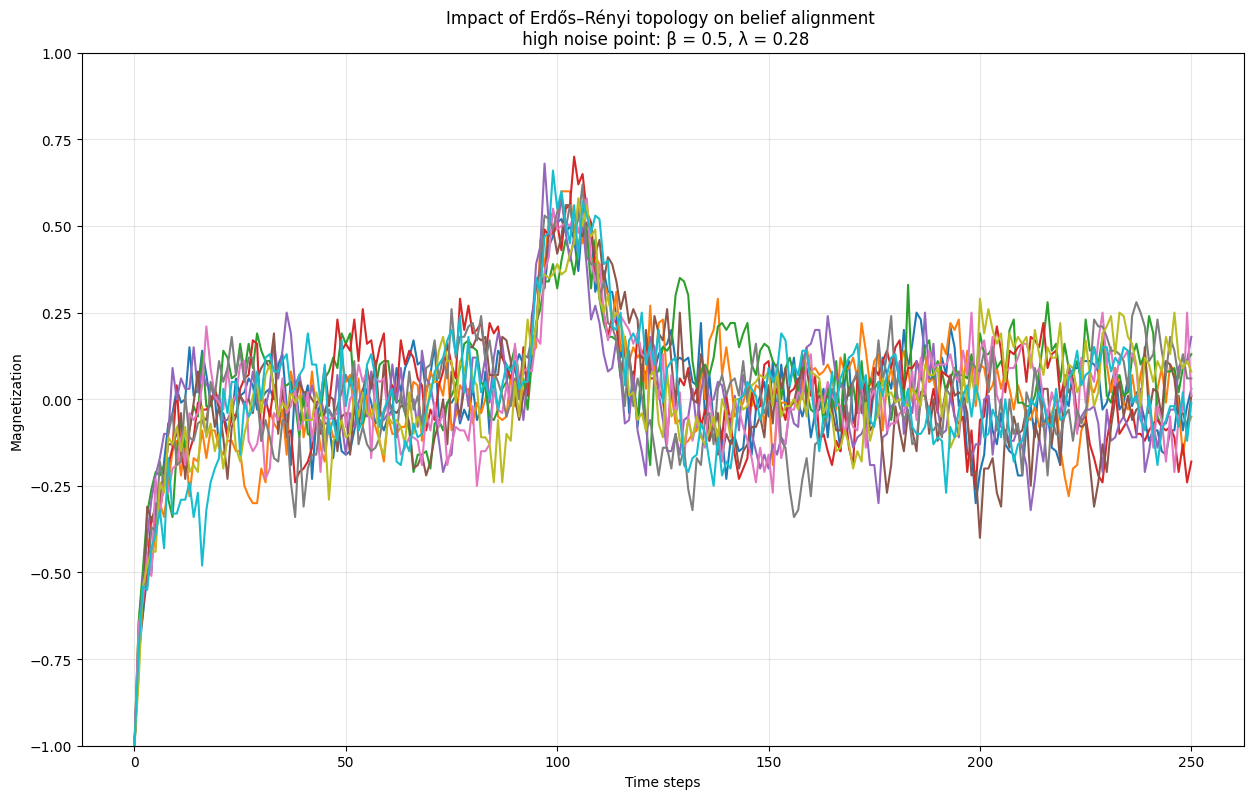

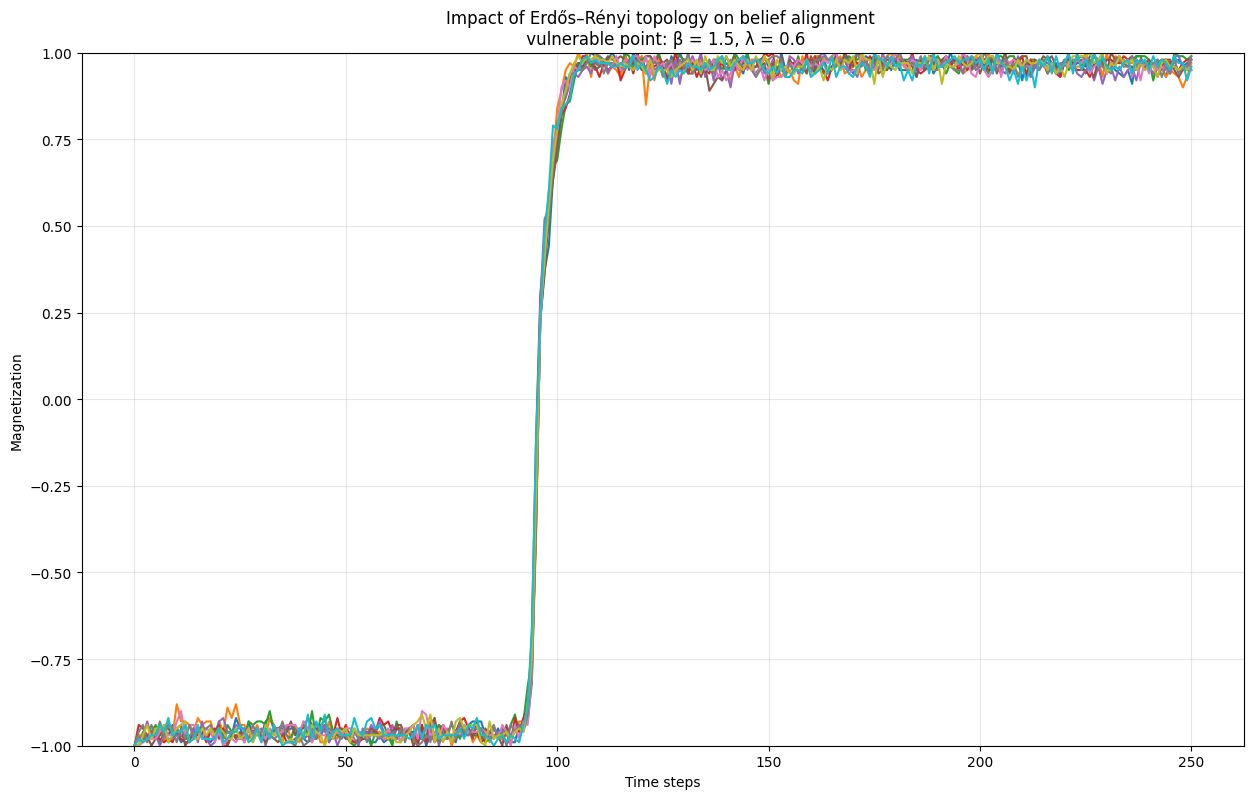

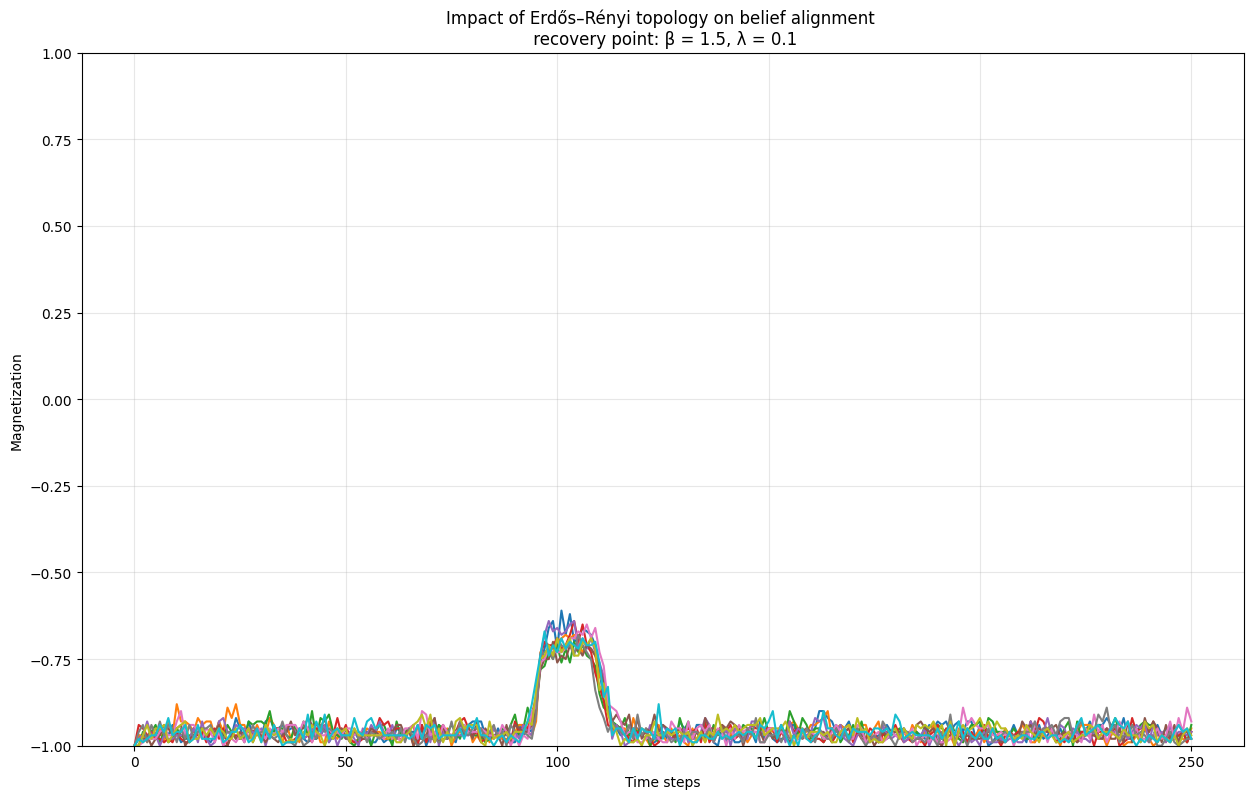

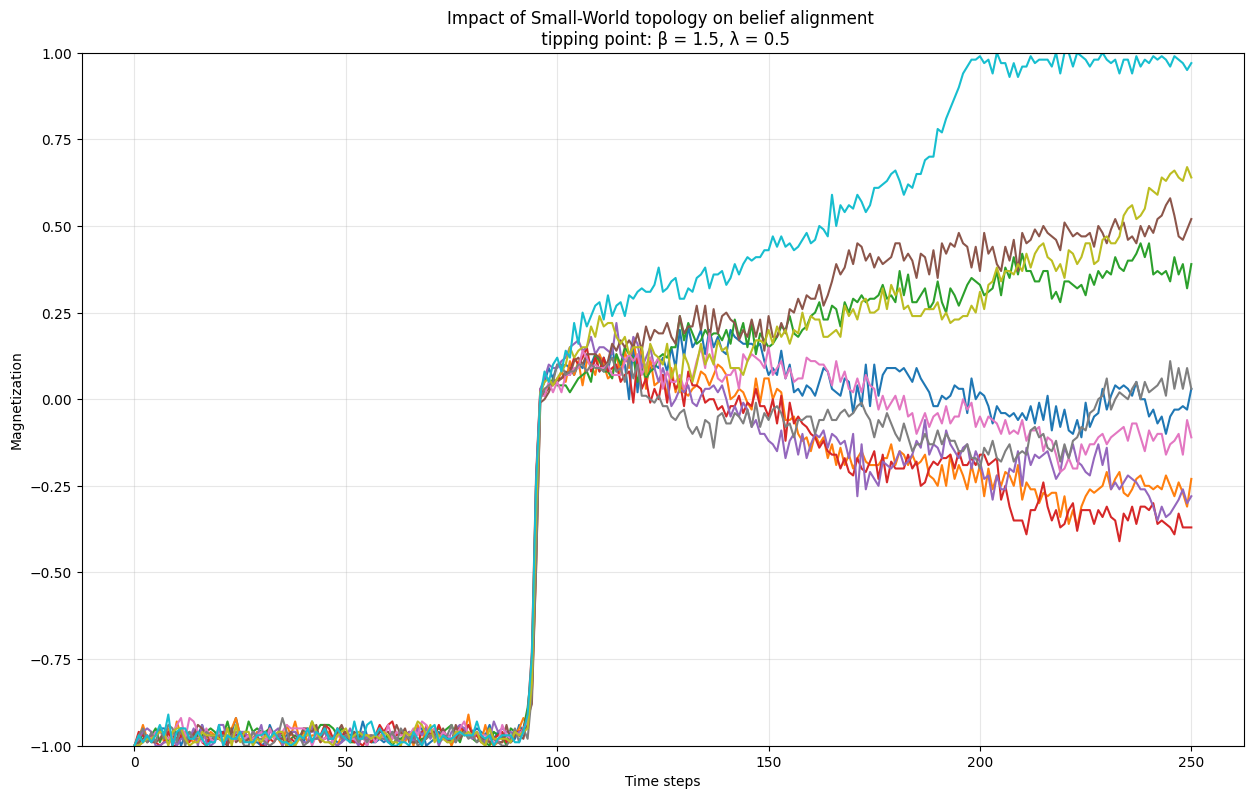

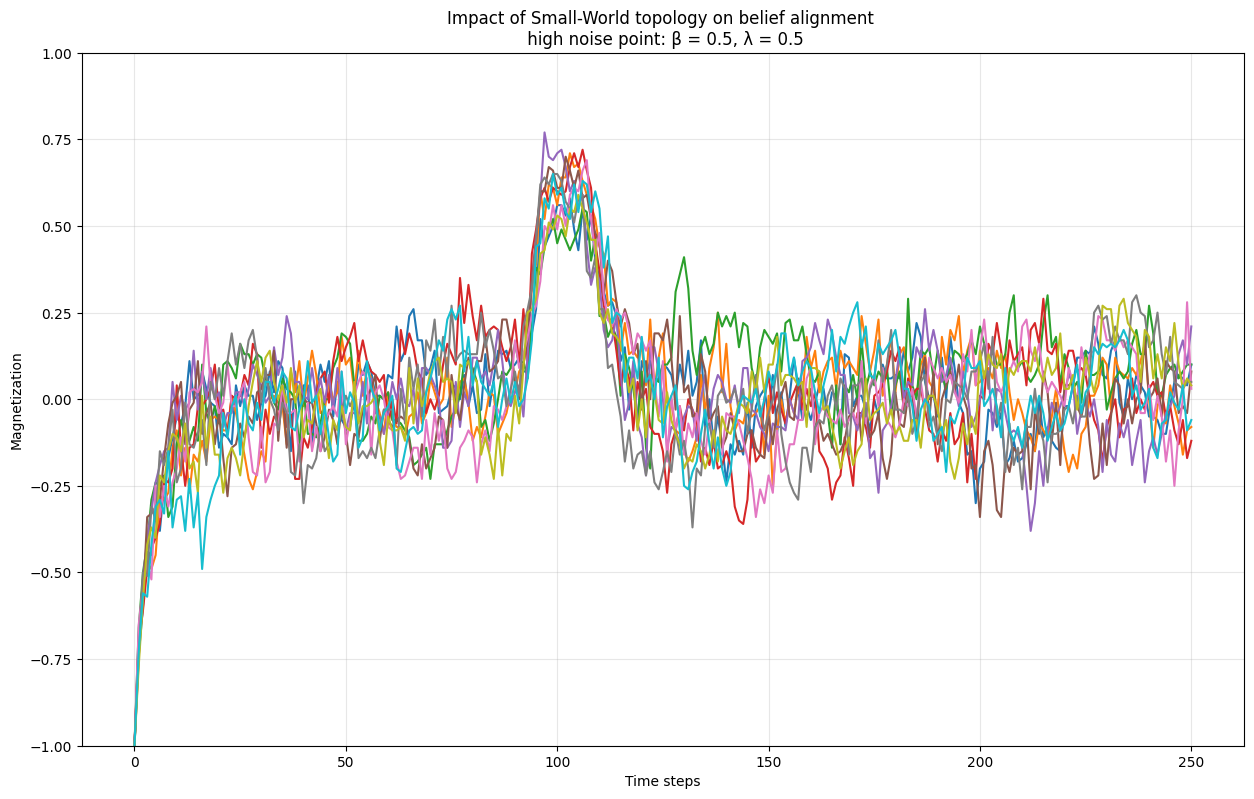

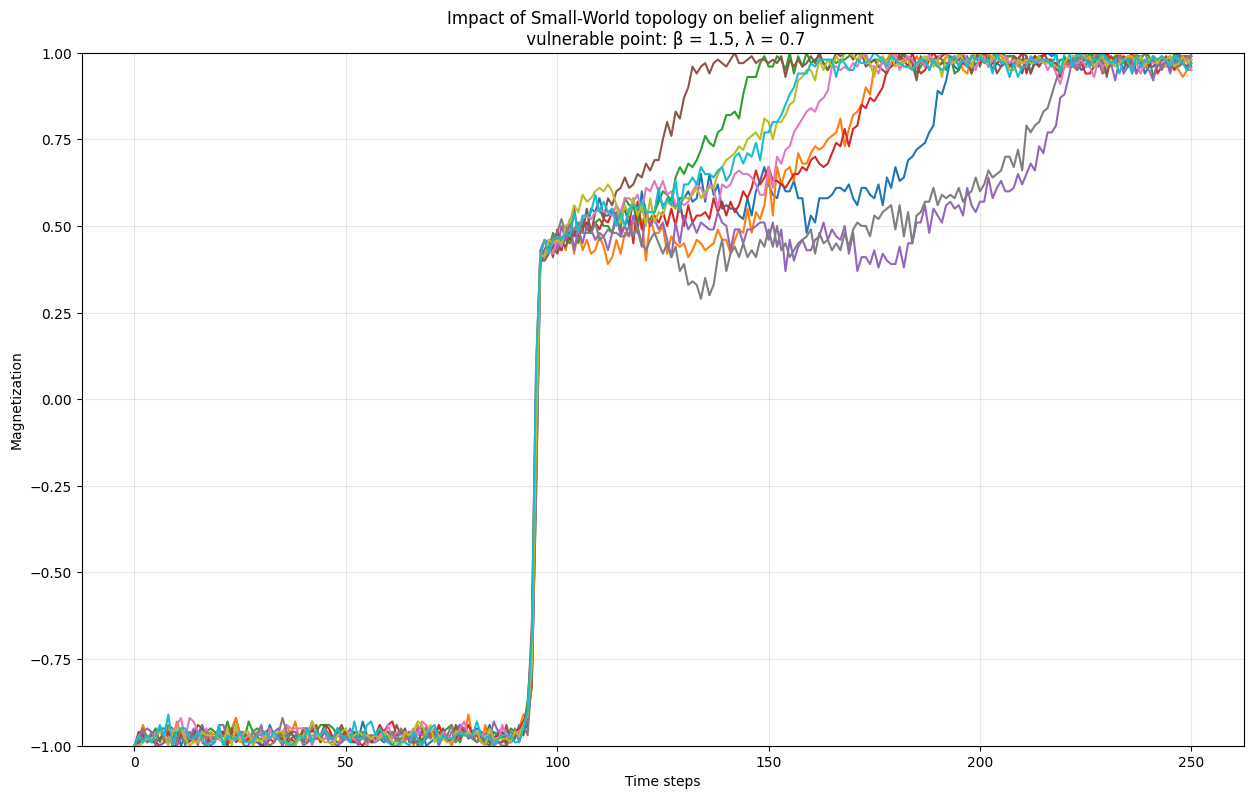

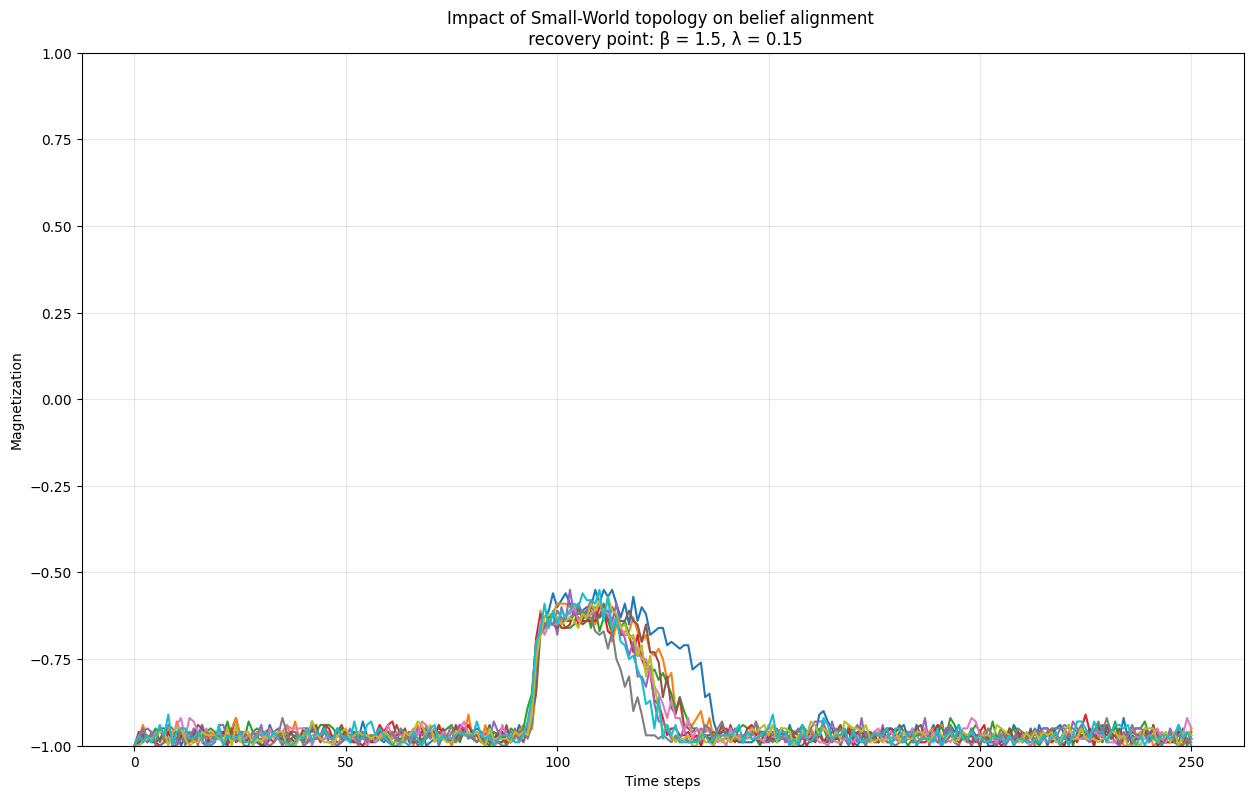

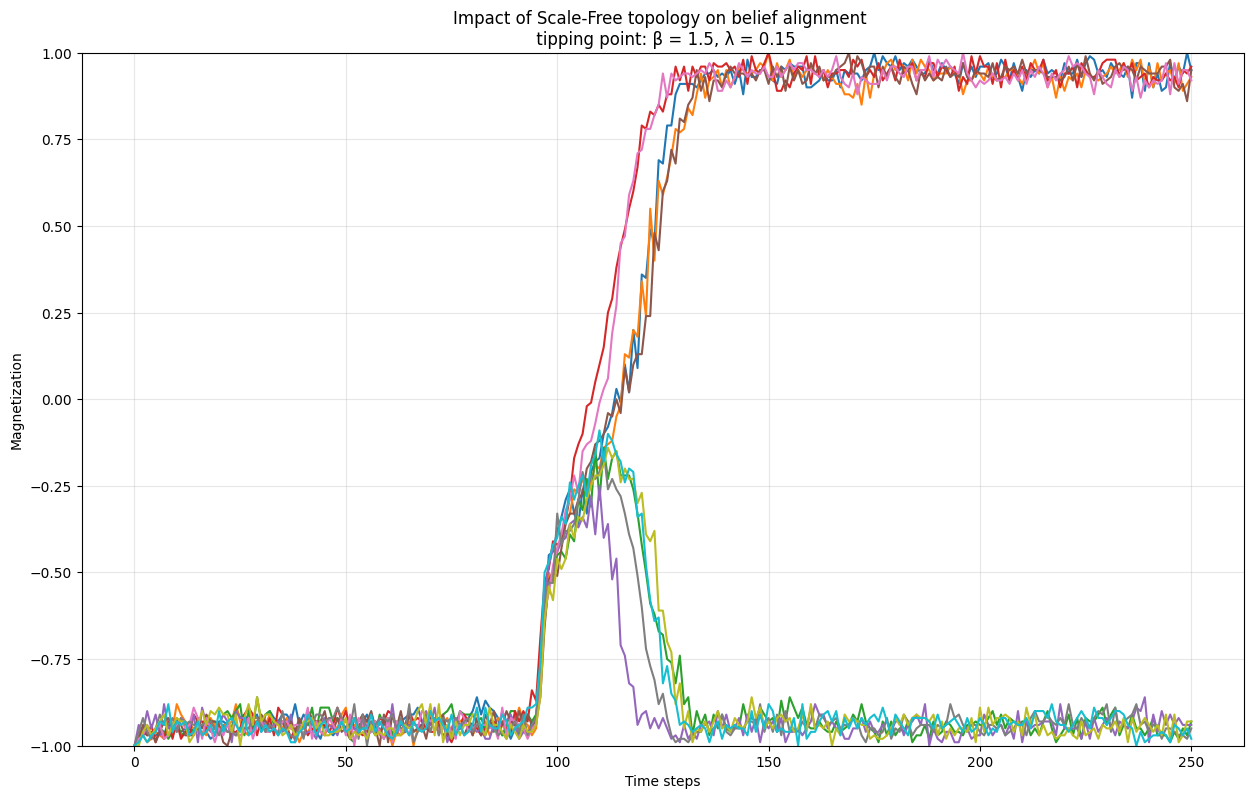

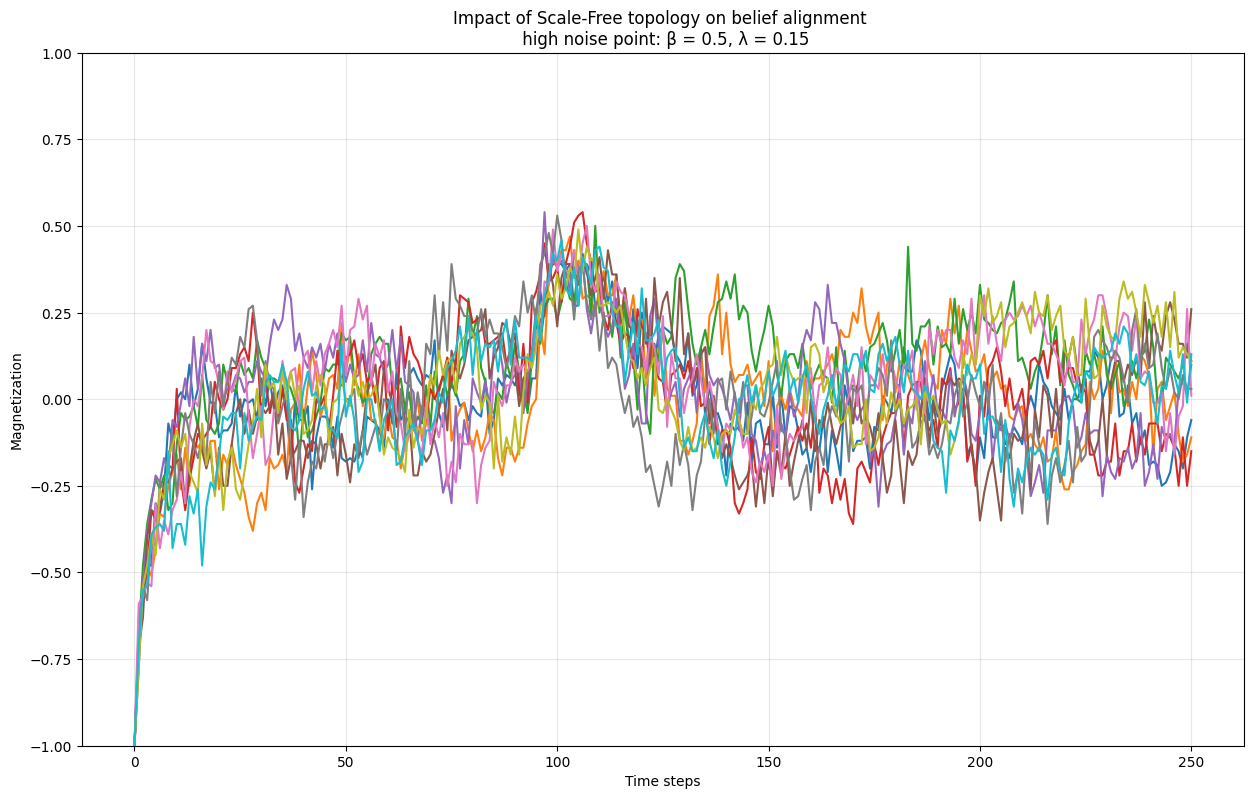

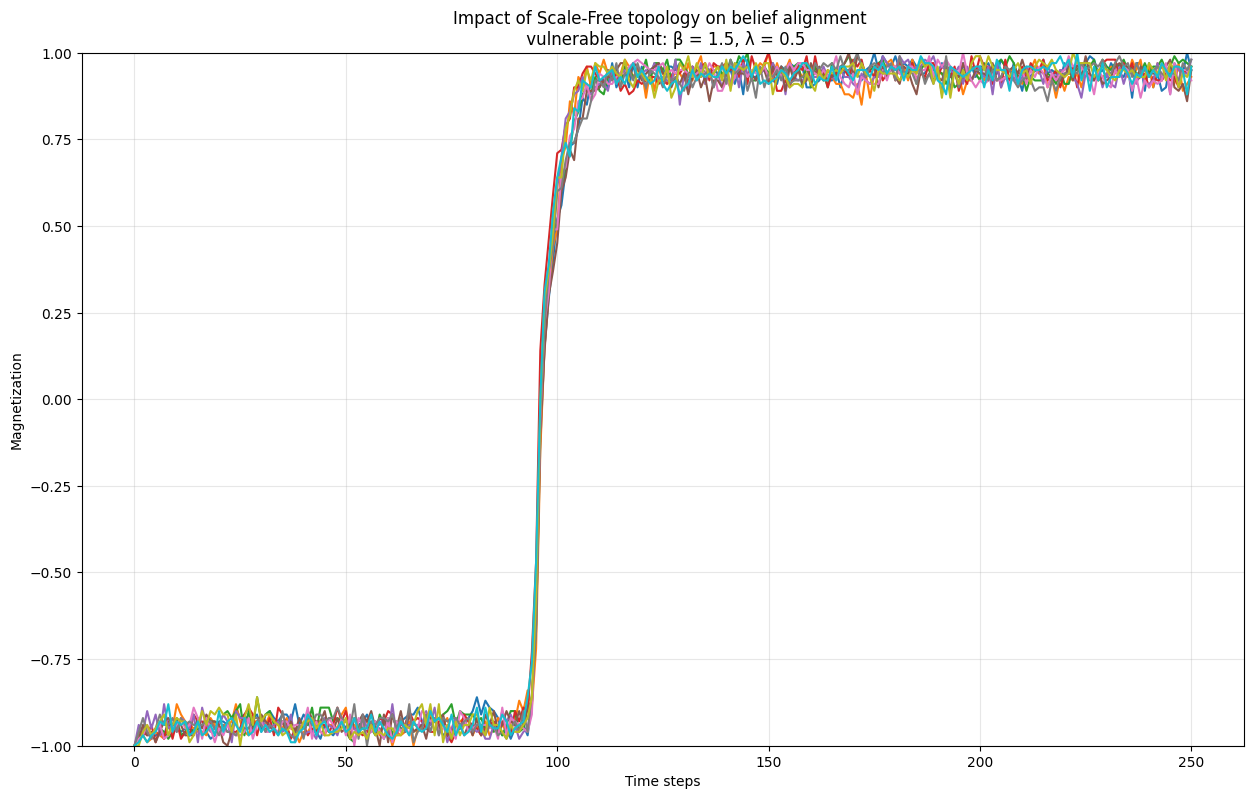

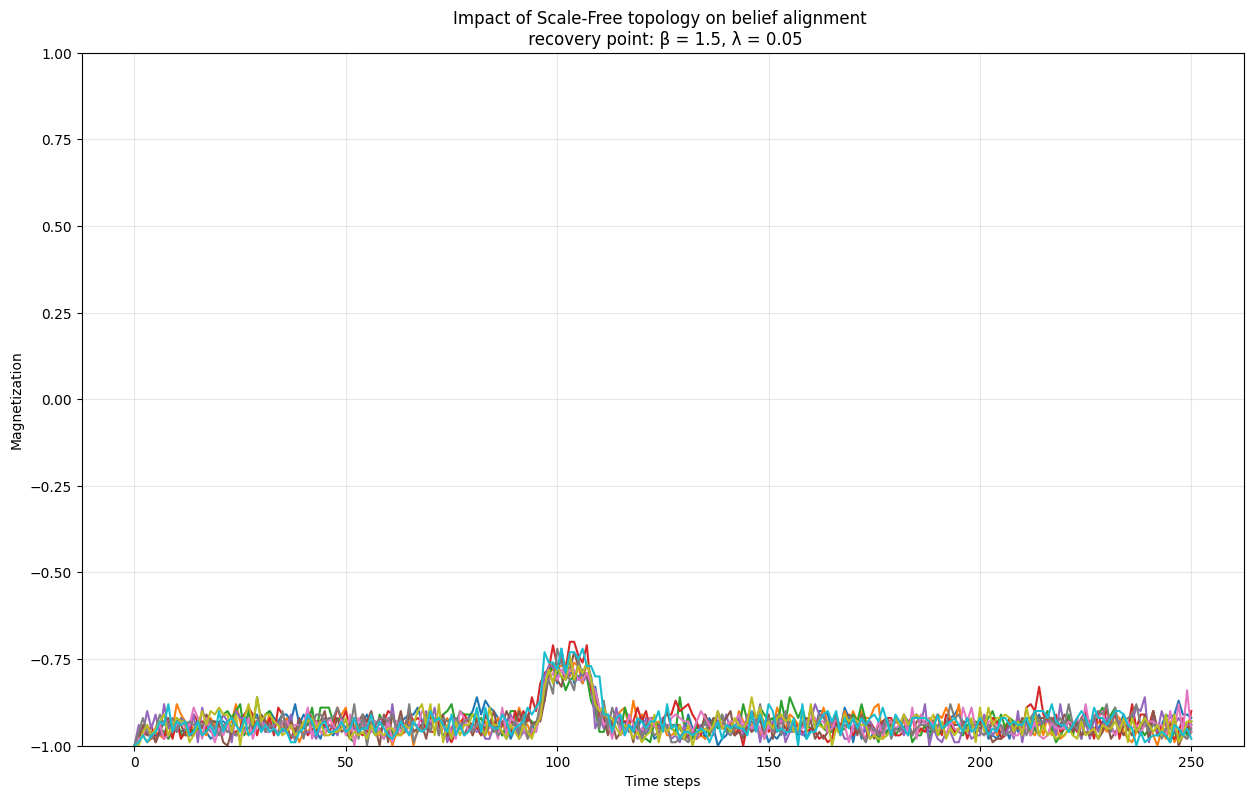

In [3]:
#network topology
topology = {"Erdős–Rényi":(network_generation.generate_erdos_renyi_sparse_adjacency_matrix,
    {"num_nodes": N, "edge_prob": edge_prob, "weight_range": weight_range}
    ),
    
    "Small-World": (
        network_generation.generate_small_world_sparse_adjacency_matrix_jax,
        {"num_nodes": N, "k": k_neighbours, "p": rewire_prob, "weight_range": weight_range}
    ),
    "Scale-Free": (
        network_generation.generate_scale_free_sparse_adjacency_matrix_jax,
        {"num_nodes": N, "num_edge": new_edges, "weight_range": weight_range}
    )}

# dictionary to store  mean magnetization of each topology
all_topology_means = {}

#  parameter sets for Erdos
parameter_sets_erdos = {
    "tipping": {"beta": 1.5, "l": 0.28}, #lambda - fraction of people being exposed to the dynamic field
    "high noise": {"beta": 0.5, "l": 0.28},
    "vulnerable": {"beta": 1.5, "l": 0.6},
    "recovery": {"beta": 1.5, "l": 0.1}
}
#  parameter sets
parameter_sets_scale_free = {
    "tipping": {"beta": 1.5, "l": 0.15},
    "high noise": {"beta": 0.5, "l": 0.15},
    "vulnerable": {"beta": 1.5, "l": 0.5},
    "recovery": {"beta": 1.5, "l": 0.05}
}
#  parameter set
parameter_sets_small_world = {
    "tipping": {"beta": 1.5, "l": 0.5},
    "high noise": {"beta": 0.5, "l": 0.5},
    "vulnerable": {"beta": 1.5, "l": 0.7},
    "recovery": {"beta": 1.5, "l": 0.15}
}


#plotting
for topology_name, (func, args) in topology.items():
    adj_mat = func(**args)
    if topology_name == 'Erdős–Rényi':
        for param_name, params in parameter_sets_erdos.items():
            simulation_topology(adj_mat, topology_name, param_name, **params)
    if topology_name == 'Small-World':
        for param_name, params in parameter_sets_small_world.items():
            simulation_topology(adj_mat, topology_name, param_name, **params)
    if topology_name == 'Scale-Free':
        for param_name, params in parameter_sets_scale_free.items():
            simulation_topology(adj_mat, topology_name, param_name, **params)


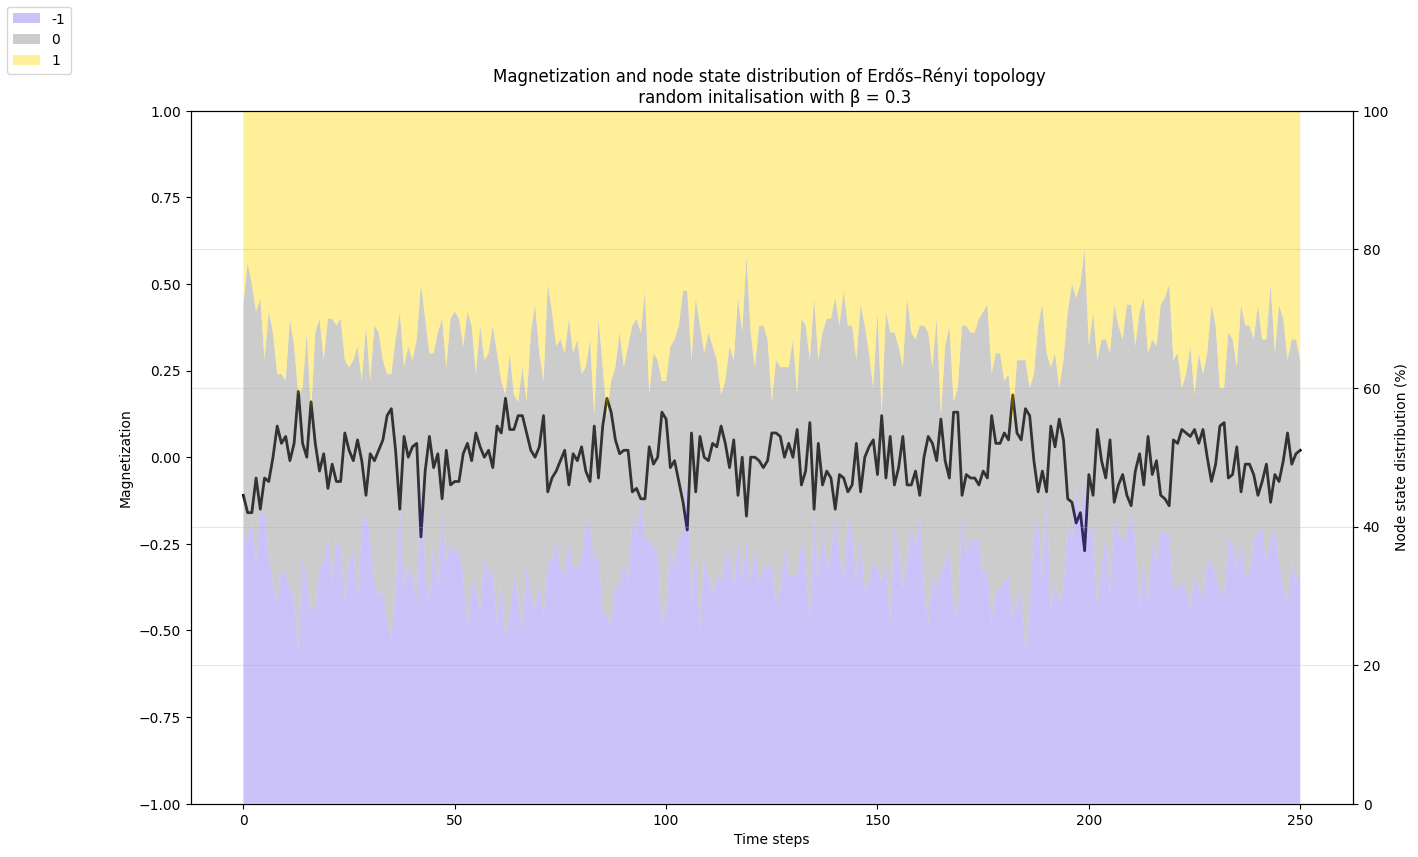

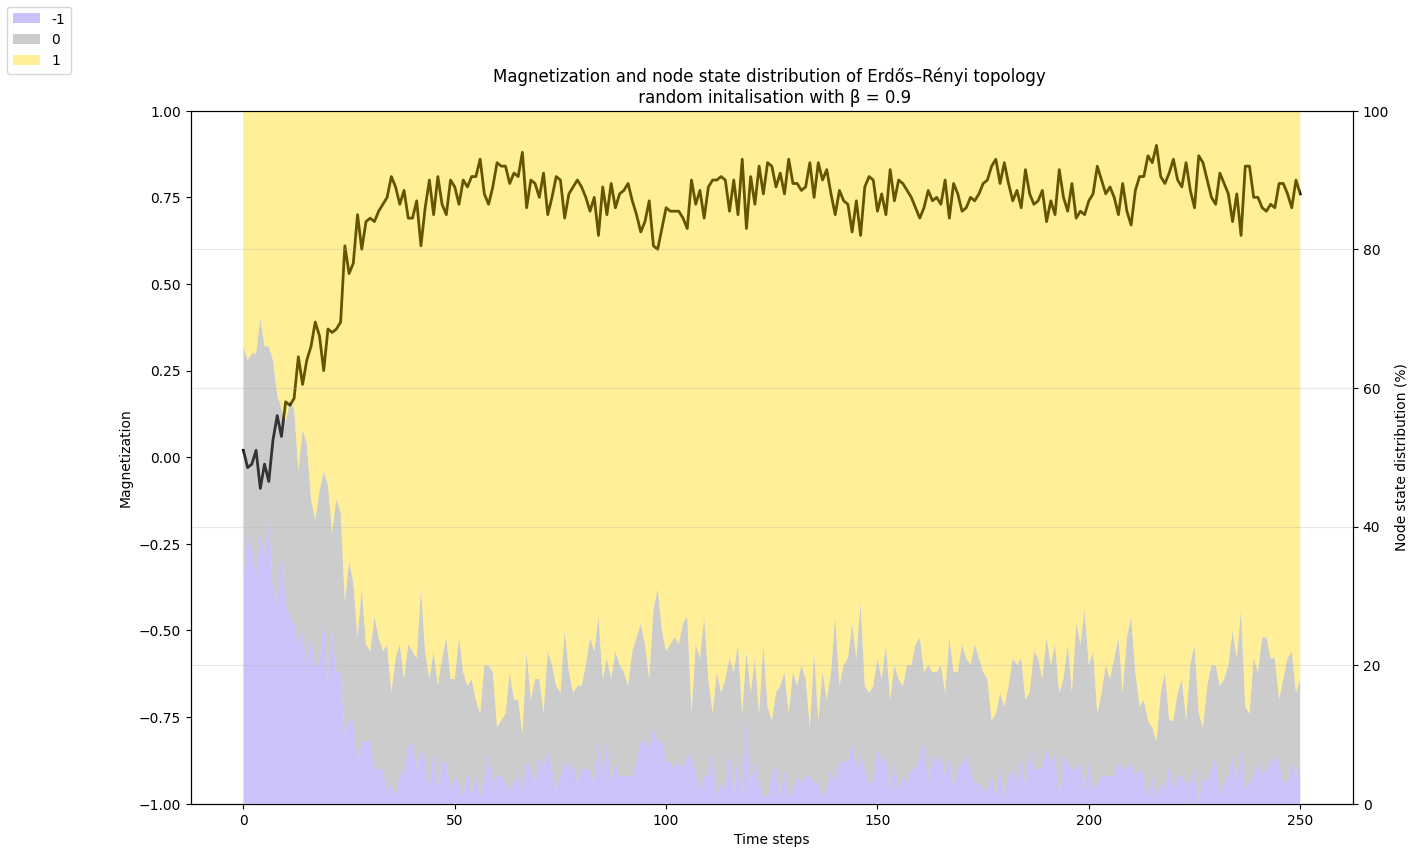

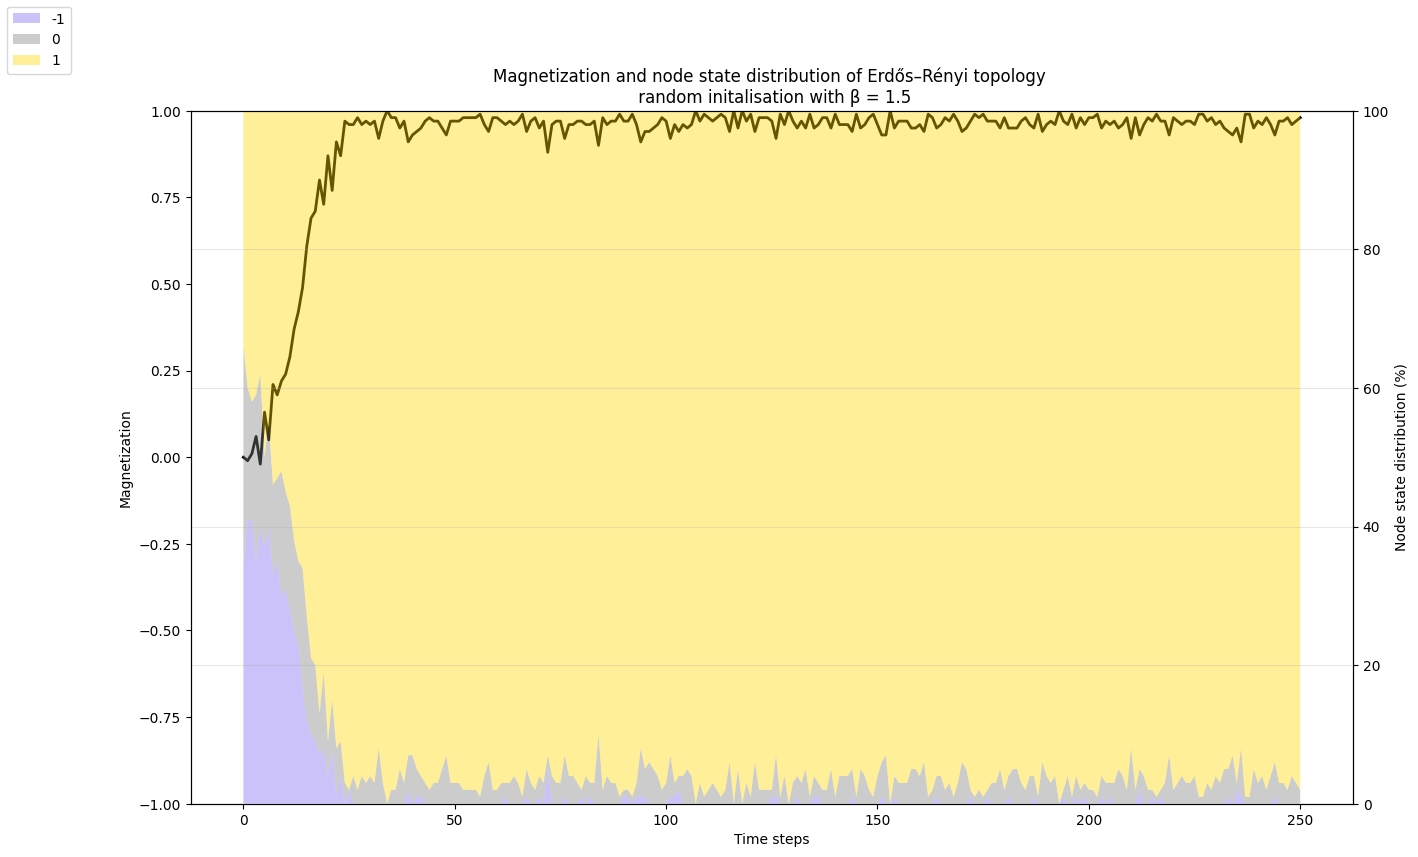

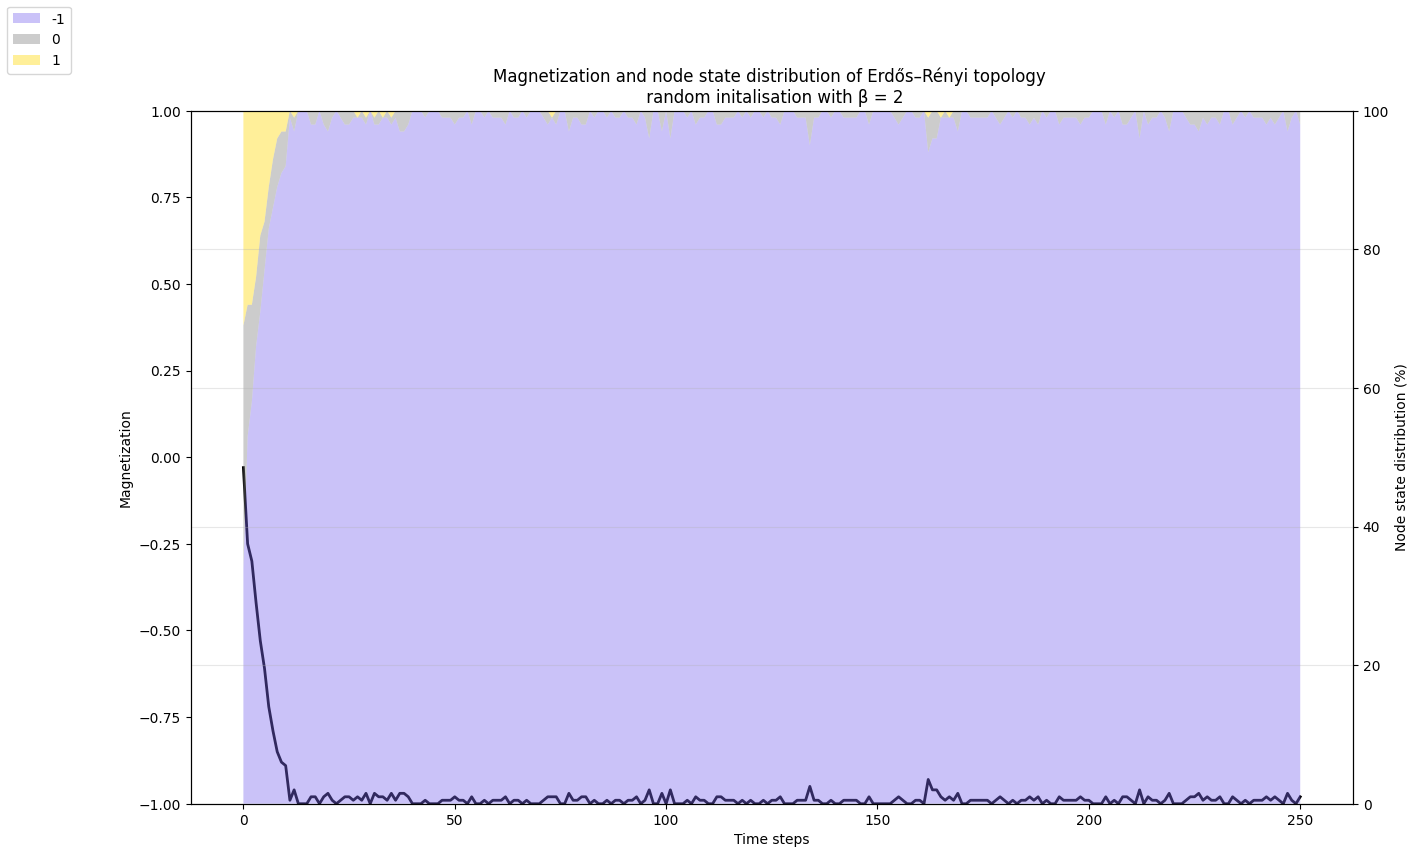

In [4]:
#  parameter sets for Erdos
parameter_sets_erdos = {
    "1": {"beta": 0.3, "l": 0},
    "2": {"beta": 0.9, "l": 0},
    "3": {"beta": 1.5, "l": 0},
    "4": {"beta": 2, "l": 0},
}


#plotting
for topology_name, (func, args) in topology.items():
    adj_mat = func(**args)
    if topology_name == 'Erdős–Rényi':
        for param_name, params in parameter_sets_erdos.items():
            simulation_no_external_field_stacked(adj_mat, topology_name, param_name, **params)

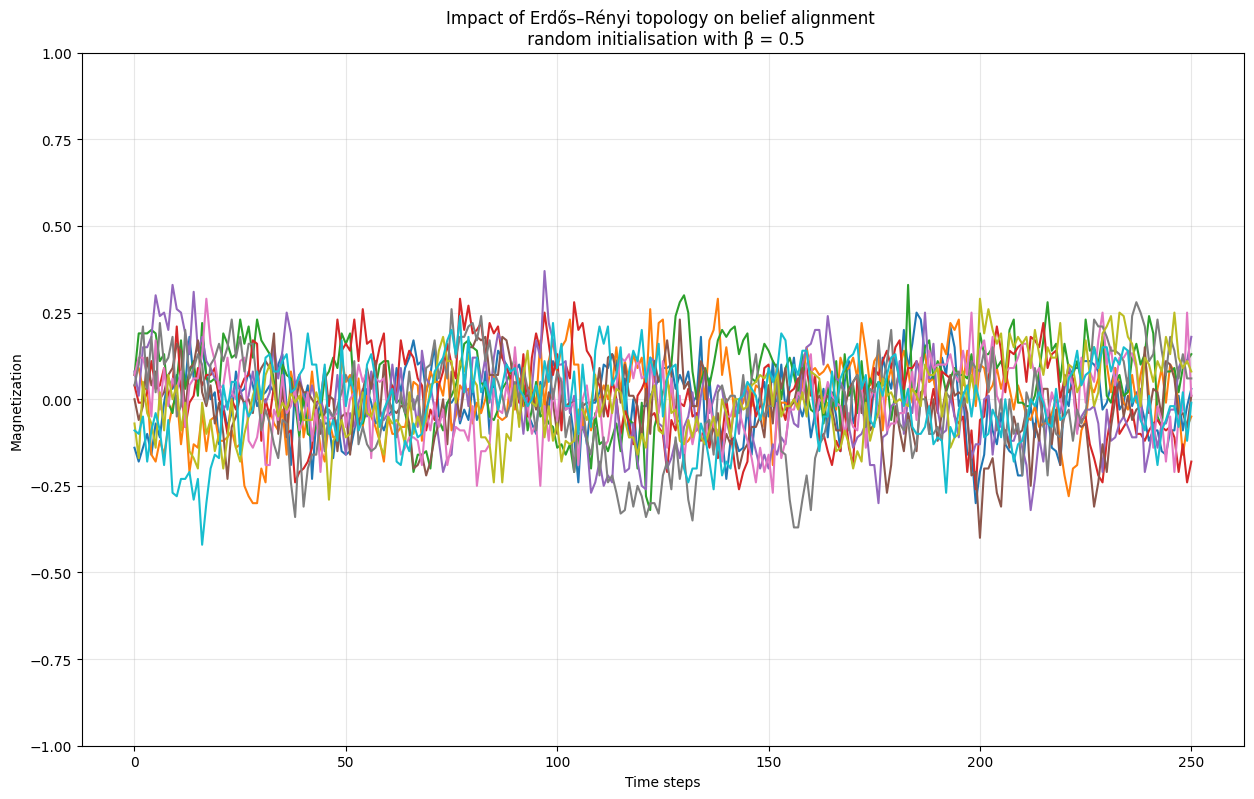

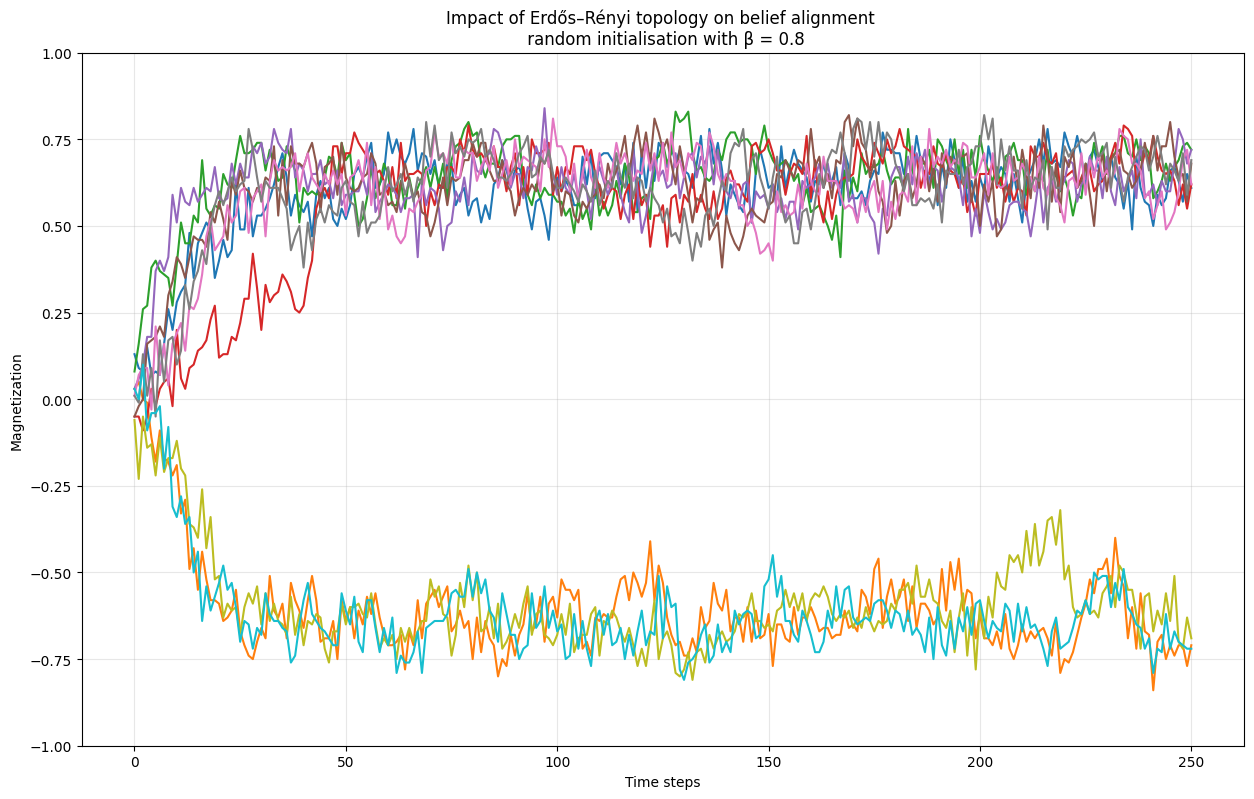

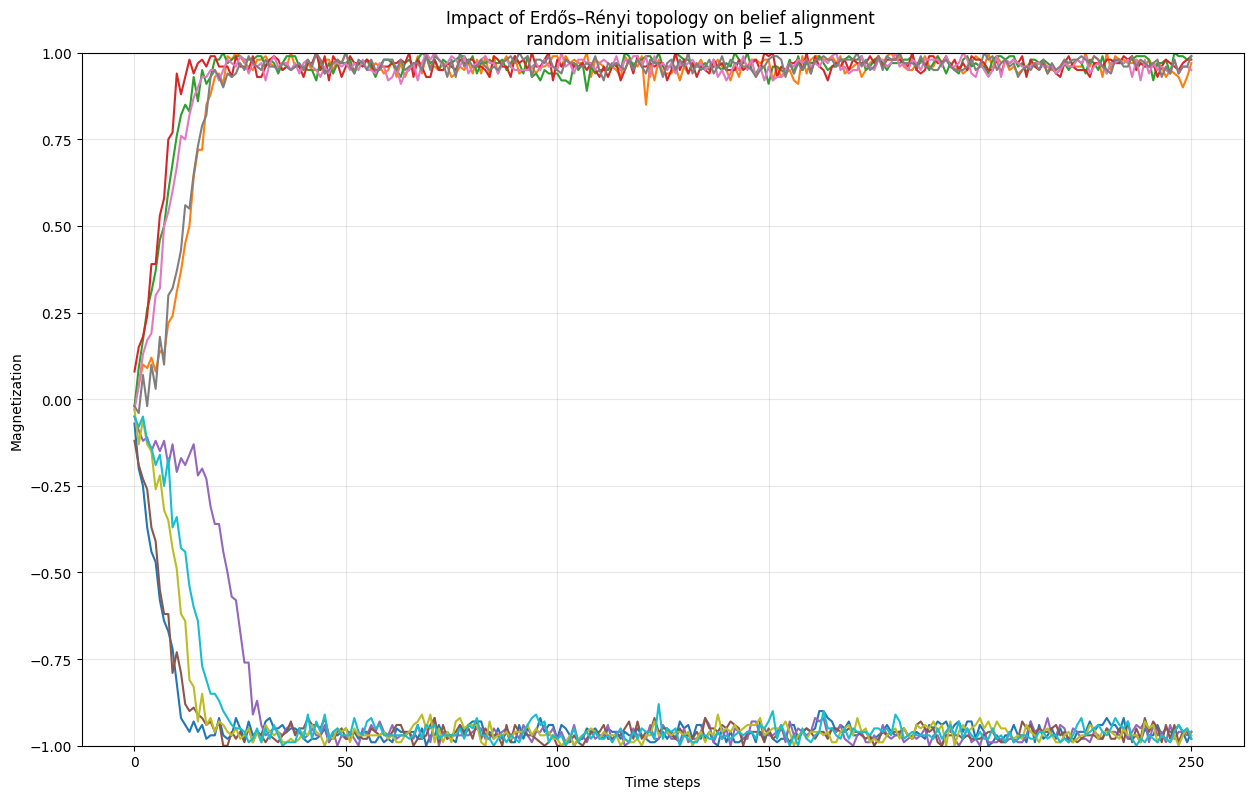

In [6]:
#  parameter sets for Erdos
parameter_sets_erdos = {
    "1": {"beta": 0.5, "l": 0},
    "2": {"beta": 0.8, "l": 0},
    "3": {"beta": 1.5, "l": 0},
}


#plotting
for topology_name, (func, args) in topology.items():
    adj_mat = func(**args)
    if topology_name == 'Erdős–Rényi':
        for param_name, params in parameter_sets_erdos.items():
            simulation_no_external_field(adj_mat, topology_name, param_name, **params)